# Parte 1

In [ ]:
import keras

from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Activation, Dropout
from keras.layers import Flatten, concatenate, AveragePooling2D
from keras.models import Model

Using TensorFlow backend.


In [ ]:
#Definicion de input y secuencia de capas de la red
Inputs = Input(shape=(224,224,3))

In [ ]:
# Definicion de la convulucion, 64 filtros de tamaño 7x7 con strides de 2h y 2v. Padding de cers, activacion relu, sin bias
x = Conv2D(64, (7, 7), strides=(2,2), padding='same', activation="relu",
use_bias=False,
name='Conv2d_1a_7x7_conv')(Inputs)
x.shape

TensorShape([None, 112, 112, 64])

In [ ]:
# MaxPool de tamaño de 3x3 y strides de 2h y 2v. Padding de ceros
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='MaxPool_2a_3x3')(
x)
x.shape

TensorShape([None, 56, 56, 64])

## Actividad 2 

---



*  Una convolucion 1x1 es equivalente a una capa densa (fully-connected), 

cuando se aplica a cada pixel de una imagen.
*  Se utiliza tipicamente para ajustar el numero de canales entre las capas y para controlar la complejidad del modelo. Eso es lo que se hizo para GoogleLeNet

In [ ]:
#1 Convoluci´on de 64 filtros, con ventana de 1x1 y un stride de 1. Sin Bias.
x=Conv2D(64,(1,1),padding='same',strides=(1,1),use_bias=False)(x)
x.shape

TensorShape([None, 56, 56, 64])

In [ ]:
# 2. Convoluci´on de 192 filtros, con ventana de 3x3, stride de 1. Sin Bias
x=Conv2D(192,(3,3),strides=(1,1),padding='same',use_bias=False)(x)
x.shape

TensorShape([None, 56, 56, 192])

In [ ]:
# 3. MaxPooling de ventana de 3x3 y stride de 2.
x=MaxPooling2D((3,3),strides=(2,2),padding='same', name='MaxPool_2b_3x3')(x)
x.shape

TensorShape([None, 28, 28, 192])

## Activdad 3


---
*   Los 3 (1x1,3x3 y 5x5 Colores azules) distintos tipos de convoluciones se utilizan para obtener distinta infromacion de dimensiones distintas.
*   Las convoluciones de 3x3 y 5x5, usan una convolucion de 1x1 para reducir el tamaño de los canales.
*   El otro camino del bloque es el que pasa por hacer primero 3x3 Max Pooling y despues una convolucion de 1x1. El proposito de esto es de cambiar el numero de canales.



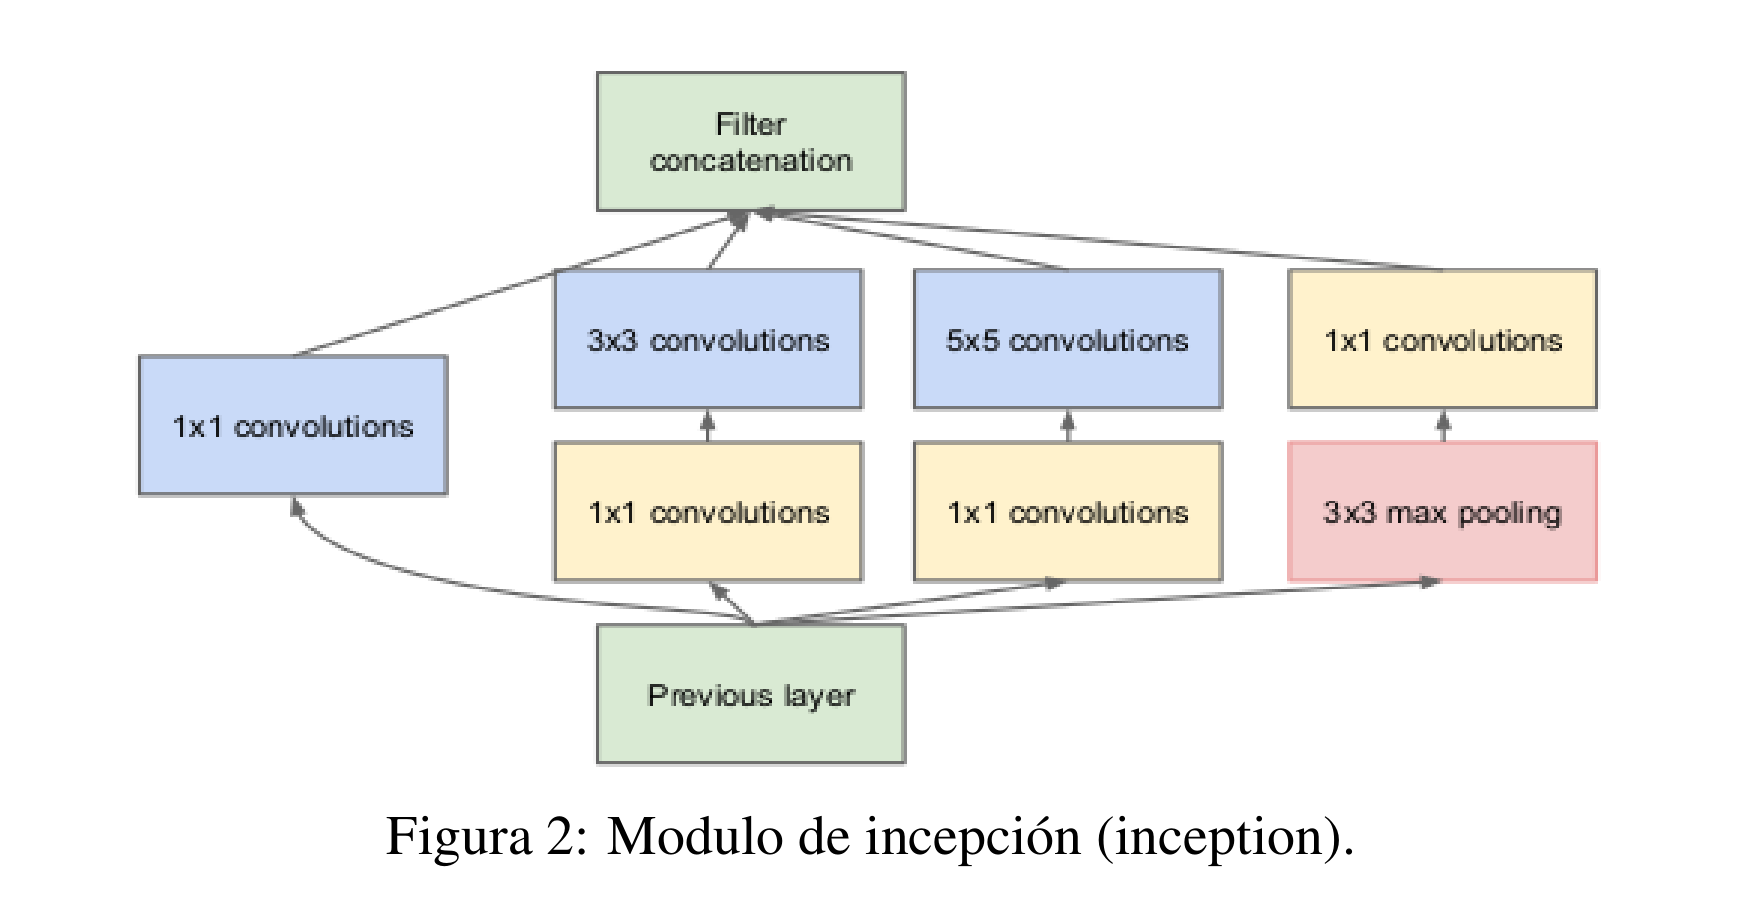

## Actividad 4

---


In [ ]:


def inception(x,filters_array,name):
  base_conv2D_arguments={'activation':"relu", 'padding':'same','strides':(1,1),
  'use_bias':False}
  ## BRANCH 0
  branch_0 = Conv2D(filters_array[0], (1, 1),
  name='Mixed_'+name+'_Branch_0_a_1x1',**base_conv2D_arguments )(x)

  ## BRANCH 1
  branch_1 = Conv2D(filters_array[1], (1, 1), **base_conv2D_arguments ,
  name='Mixed_'+name+'Branch_1_a_1x1')(x)

  branch_1 = Conv2D(filters_array[2], (3, 3),**base_conv2D_arguments,
  name='Mixed_'+name+'Branch_1_b_3x3')(branch_1)

  ## BRANCH 2
  branch_2 = Conv2D(filters_array[3], (1, 1), **base_conv2D_arguments,
  name='Mixed_'+name+'Branch_2_a_1x1')(x)

  branch_2 = Conv2D(filters_array[4], (5, 5), **base_conv2D_arguments,
  name='Mixed_'+name+'Branch_2_b_5x5')(branch_2)

  ## BRANCH 3
  branch_3 = MaxPooling2D((3, 3), strides=(1,1), padding='same',name='MaxPool'+name+'_Branch_3_a_3x3')(x)

  branch_3 = Conv2D(filters_array[5], (1, 1), **base_conv2D_arguments,
  name='Mixed_'+name+'Branch_3_b_1x1')(branch_3)

  ## CONCATENATE
  return concatenate([branch_0,branch_1,branch_2,branch_3],
  axis=3,
  name='Mixed_'+name+'Concatenated')

x=inception(x,[64,96,128,16,32,32],"3A")
x.shape

TensorShape([None, 28, 28, 256])

## Actividad 5

In [ ]:
# 3.b
x=inception(x,[128,128,192,32,96,64],"3B")

x=MaxPooling2D((3,3),strides=(2,2),padding='same',name='MaxPool_3-4_3x3')(x)


# 4.a
x=inception(x,[192,96,208,16,48,64],"4A")

# 4.b
x=inception(x,[160,112,224,24,64,64],"4B")

# 4.c
x=inception(x,[128,128,256,24,64,64],"4C")

# 4.d
x=inception(x,[112,144,288,32,64,64],"4D")

# 4.e
x=inception(x,[256,160,320,32,128,128],"4E")

x=MaxPooling2D((3,3),strides=(2,2),padding='same',name='MaxPool_4-5_3x3')(x)

# 5.a
x=inception(x,[256,160,320,32,128,128],"5A")

# 5.b
x=inception(x,[384,192,384,48,128,128],"5B")

x.shape



TensorShape([None, 7, 7, 1024])

## Actividad 6

---



In [ ]:
x=AveragePooling2D((7,7),strides=(1,1),padding='valid',name='AvgPool_7x7')(x)
x.shape


TensorShape([None, 1, 1, 1024])

In [ ]:

x=Flatten(name='linear')(x)
x=Dropout(0.4,name='dropout')(x)
x=Dense(1000)(x)
x=Activation('softmax')(x)


In [ ]:

final_model = Model([Inputs],x)

final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_7x7_conv (Conv2D)     (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
MaxPool_2a_3x3 (MaxPooling2D)   (None, 56, 56, 64)   0           Conv2d_1a_7x7_conv[0][0]         
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 64)   4096        MaxPool_2a_3x3[0][0]             
____________________________________________________________________________________________

Se puede ver en el model.summary, que la salida son 1000 clasificadores

Segun el paper: "The softmax probabilities are averaged over multiplecrops and over all the individual classifiers to obtainthe final prediction.  In our experiments we analyzed alternative approaches on the validation data, such as **max pooling** over crops and averaging over classifiers,but they lead to inferior performance than the simple averaging"

Es decir, utilizaron softmax para las predicccions finales y validaciones de los datos.Entregaban mejor performacnce que usar MaxPooling.

# Parte 2



## Actividad 7


| Red            | Profundidad | Numero de parametros | Rendimiento |
|----------------|-------------|----------------------|-------------|
| AlexNet (DCCN) | 5           | 60 Millones          | 63,3        |
| ResNet-50      | 50          | 25.6 Millones        | 81,2        |
| GoogleLeNet    | 22          | 5 Millones           | 69,8%       |

Fuente https://paperswithcode.com/sota/image-classification-on-imagenet

* Mejorar el numero de capas puede mejorar el rendimiento. 
* El numero de parametros no es un determinante para obtener mejores rendimientos.
* No hay una "formula" que describa que un numero de capas entrega cierto rendimiento. Lo interesante es que GoogleNet tiene mejor rendimiento que AlexNet al agregarle varias capas y entrenar menor parametros. 
* La leccion aprendida es que se deben manejar ambos parametros (numeros de capas y numero de parametros) para tratar de encontrar soluciones que sean mas costo eficientes y con altos rendimientos.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Actividad 8

El modelo que se utilizo es una implementacion de GoogLeNet que esta ajustado para CIFAR-10

https://github.com/meng1994412/GoogLeNet_from_scratch


CIFAR-10 Tiene 6000 imagenes, se utilizan 5000 para el entrenamiento y 1000 para la validacion.

La solucion que se presenta fue llevada acabo a partir de varias iteraciones de distintos optimizadores y hiperparametros. 
* Primero se entreno usando RMProp con el 
proposito de seguir las recomendaciones para GoogleLeNet. 
* Se inicializo con un LR (Learning Rate) de 1e-4 como fue recomendado por el profesor en clse. 
* El problema es que este entrenamiento se tardaba mucho (3 horas para 50 epocas) y mientras estaba entrenado el accuracy en el set de validacion y entrenamiento se quedo estancado ~60%

Dado el alto costo de entrenamiento y los resultados poco satisfactorios, decidi modificar el optimizador y utilizar ADAM para tratar de mejorar los tiempos de entrenamiento. La idea fue inspirada por las clases, que fue empezar con ADAM y despues utilizar SGD para mejorar el accuracy (camino lento pero seguro). Utilizando estas tecnicas se llego a un accuracy de ~80% en solo 1 hora de entrenamiento. 
* Para poder hacer ese cambio, se guardo los parametros entrenados en un archivo en Drive para cada epocha y despues se cargo a partir de las epochas anteriores. Esto permitia cambiar los optimizadores a "medio camino"

- El ajuste de parametros fue manual dado que no logre utilizar las librerias optimizadoras que encontre. Se me desconectaba Colab o tenia problemas entre las version de keras que usa tensorflow y keras normal.

- El tamaño de minibatch se aumento de 32 a 100, sin mayor diferencia en el accuracy. Se disminuyo en ~2% pero se gano tiempo de entrenamiento.

MiniGoogLeNet https://github.com/meng1994412/GoogLeNet_from_scratch/blob/master/pipeline/nn/conv/minigooglenet.py

In [ ]:
import keras
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from keras import backend as K
from keras.callbacks import *
from keras.datasets import cifar10,cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import  Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adam

import os
import datetime
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [ ]:
class MiniGoogLeNet:
    @staticmethod
    def conv_module(x, K, kX, kY, stride, chanDim, padding = "same"):
        # define a CONV => BN => RELU pattern
        x = Conv2D(K, (kX, kY), strides = stride, padding = padding)(x)
        x = BatchNormalization(axis = chanDim)(x)
        x = Activation("relu")(x)

        # return the block
        return x

    @staticmethod
    def inception_module(x, numK1x1, numK3x3, chanDim):
        # define two CONV modules, then concatenate across the channel dimension
        conv_1x1 = MiniGoogLeNet.conv_module(x, numK1x1, 1, 1, (1, 1), chanDim)
        conv_3x3 = MiniGoogLeNet.conv_module(x, numK3x3, 3, 3, (1, 1), chanDim)
        x = concatenate([conv_1x1, conv_3x3], axis = chanDim)

        # return the block
        return x

    @staticmethod
    def downsample_module(x, K, chanDim):
        # define the CONV module and POOL, then concatenate across the channel dimensions
        conv_3x3 = MiniGoogLeNet.conv_module(x, K, 3, 3, (2, 2), chanDim, padding = "valid")
        pool = MaxPooling2D((3, 3), strides = (2, 2))(x)
        x = concatenate([conv_3x3, pool], axis = chanDim)

        # return the block
        return x

    @staticmethod
    def build(width, height, depth, classes):
        # initialize the input shape to be "channel last" and channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channel first", update the inpute shape and channel dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # define the model input and first CONV module
        inputs = Input(shape = inputShape)
        x = MiniGoogLeNet.conv_module(inputs, 96, 3, 3, (1, 1), chanDim)

        # two Inception modules followed by a downsample module
        x = MiniGoogLeNet.inception_module(x, 32, 32, chanDim)
        x = MiniGoogLeNet.inception_module(x, 32, 48, chanDim)
        x = MiniGoogLeNet.downsample_module(x, 80, chanDim)

        # four Inception module followed by a downsample module
        x = MiniGoogLeNet.inception_module(x, 112, 48, chanDim)
        x = MiniGoogLeNet.inception_module(x, 96, 64, chanDim)
        x = MiniGoogLeNet.inception_module(x, 80, 80, chanDim)
        x = MiniGoogLeNet.inception_module(x, 48, 96, chanDim)
        x = MiniGoogLeNet.downsample_module(x, 96, chanDim)

        # two Inception module followed by global POOL and dropout
        x = MiniGoogLeNet.inception_module(x, 176, 160, chanDim)
        x = MiniGoogLeNet.inception_module(x, 176, 160, chanDim)
        x = AveragePooling2D((7, 7))(x)
        x = Dropout(0.5)(x)

        # softmax classifier
        x = Flatten()(x)
        x = Dense(classes)(x)
        x = Activation("softmax")(x)

        # create the model
        model = Model(inputs, x, name = "googlenet")

        # return the constructed network architecture
        return model

In [ ]:

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

filepath="/content/drive/My Drive/Carpeta sin título/epochs:{epoch:03d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks_list = [tensorboard_callback]


def data():
  # The data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)



  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  return x_train,y_train,x_test,y_test


In [ ]:
model= MiniGoogLeNet.build(width = 32, height = 32, depth = 3, classes = 10)
# initiate RMSprop optimizer
# opt = RMSprop(learning_rate=1e-4,decay=1e-6)
opt = Adam(learning_rate=1e-4)

# model.compile(optimizer=opt,loss=)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print('Not using data augmentation.')


saved_epochs=0
# model.load_weights("/content/drive/My Drive/Carpeta sin título/epochs:{epochs:03d}.hdf5".format(epochs=saved_epochs))

print('Not using data augmentation.')
x_train,y_train,x_test,y_test=data()
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          initial_epoch=saved_epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=callbacks_list)
score, acc = model.evaluate(x_test, y_test, verbose=0)



Not using data augmentation.
Not using data augmentation.
170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
  160/50000 [..............................] - ETA: 55:02 - loss: 2.4997 - accuracy: 0.1250  

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.125604). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 115s 2ms/step - loss: 1.3940 - accuracy: 0.4971 - val_loss: 1.0891 - val_accuracy: 0.6095
Epoch 2/30
50000/50000 [==============================] - 104s 2ms/step - loss: 0.9728 - accuracy: 0.6580 - val_loss: 1.0244 - val_accuracy: 0.6502
Epoch 3/30
50000/50000 [==============================] - 105s 2ms/step - loss: 0.7859 - accuracy: 0.7274 - val_loss: 1.0995 - val_accuracy: 0.6202
Epoch 4/30
50000/50000 [==============================] - 107s 2ms/step - loss: 0.6569 - accuracy: 0.7730 - val_loss: 0.8778 - val_accuracy: 0.6980
Epoch 5/30
50000/50000 [==============================] - 106s 2ms/step - loss: 0.5556 - accuracy: 0.8089 - val_loss: 0.7330 - val_accuracy: 0.7496
Epoch 6/30
50000/50000 [==============================] - 104s 2ms/step - loss: 0.4581 - accuracy: 0.8453 - val_loss: 0.9153 - val_accuracy: 0.7075
Epoch 7/30
50000/50000 [==============================] - 104s 2ms/step - loss: 0.3890 - accuracy: 0.8692 - val_loss: 0.764

Se entreno hasta el epoch 55 con RMSProp, y despues se utilizo SGD porque el val_accuracy se quedo estancado en ~76%. Usando SGD desde ese punto el accuracy subio a 83%. No mejoro el accuracy mas alla de ese valor.


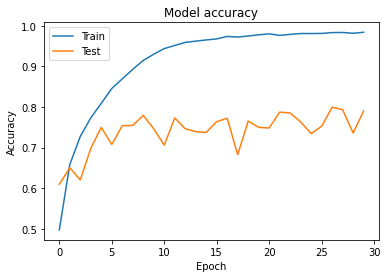

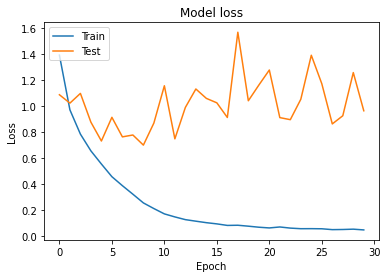

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Actividad 9





- Podemos ver que el accuracy de el set de entrenamiento esta muy lejos del de set de test. La diferencia es de un 30% entre los accuracy

- Hay altas variaciones entre las epochas, esto nos dice que el modelo estuvo "perdido" con imagenes que probablemte eran muy parecidas pero su prediccion estaba muy incorrecta. 

- Si la curva de validacion fuera mas suave, esto implicaria que la optimizacion se estaba haciendo en un camino "certero" y con mejoras graduales pero hacia la direccion correcta. 

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Confusion matrix, without normalization
[[852  12  23  11  13   0  11  12  41  25]
 [ 12 922   1   4   2   1   3   1   9  45]
 [ 55   2 736  36  51  43  45  23   4   5]
 [ 17   3  47 688  41 115  41  27  12   9]
 [ 11   2  42  39 805  17  32  45   7   0]
 [  3   1  28 118  34 751  22  37   4   2]
 [ 12   1  29  32  21  17 875   4   6   3]
 [  9   0  18  26  28  40   3 864   1  11]
 [ 42  12   4   9   0   2   5   4 911  11]
 [ 20  35   4   5   4   2   5   3  15 907]]


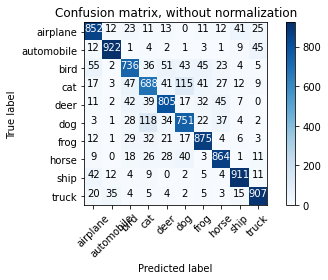

Normalized confusion matrix
[[0.85 0.01 0.02 0.01 0.01 0.   0.01 0.01 0.04 0.03]
 [0.01 0.92 0.   0.   0.   0.   0.   0.   0.01 0.04]
 [0.06 0.   0.74 0.04 0.05 0.04 0.04 0.02 0.   0.01]
 [0.02 0.   0.05 0.69 0.04 0.12 0.04 0.03 0.01 0.01]
 [0.01 0.   0.04 0.04 0.81 0.02 0.03 0.04 0.01 0.  ]
 [0.   0.   0.03 0.12 0.03 0.75 0.02 0.04 0.   0.  ]
 [0.01 0.   0.03 0.03 0.02 0.02 0.88 0.   0.01 0.  ]
 [0.01 0.   0.02 0.03 0.03 0.04 0.   0.86 0.   0.01]
 [0.04 0.01 0.   0.01 0.   0.   0.01 0.   0.91 0.01]
 [0.02 0.04 0.   0.01 0.   0.   0.01 0.   0.01 0.91]]


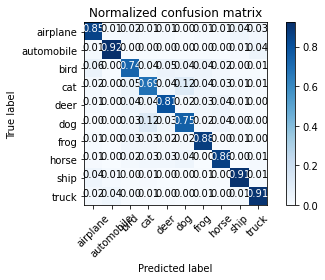

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# import for showing the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


x_train,y_train,x_test,y_test=data()

yPred_probabilities =model.predict(x_test, batch_size=batch_size)
yPred = np.argmax(yPred_probabilities, axis=1)

yTest_original=np.argmax(y_test,axis=1)

cnf_matrix=confusion_matrix(y_true=yTest_original, y_pred=yPred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion 

plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization CIFAR-10')
plt.show()
# Plot normalized confusion 

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix CIFAR-10')

plt.show()

## Actividad 10
- Exactiud promedio del set de validacion: ~74%
- Exactitud promedio del set de entrenamiento: ~89%
- Son bajas las exactitudes y la de validacion tiene una alta variabilidad. Aumentando la cantidad de imagenes en el entrenamiento, se podria reducir de gran manera esta variabilidad y mejorar las exactitudes promedio. Se podria usar Data Augmentation

- Podemos ver que hay un alto nivel de confusion entre las clases "Cat", "Dog" y "Deer". Esto tiene sentido dado que con baja resolucion en las imagenes, estos animales pueden ser parecidos y la confusion tiene sentido.

- Los automobiles obtuvieron menores valores de confusion. Esto tiene sentido dado que la distinccion entre ellos se puede ver mejor en baja resolucion que los animales. Son mas faciles de distinguir porque tienen atributos que no dependen de la baja resolucion de las imagenes. Como lo son las alas de los aviones y el agua alrededor de los botes.

In [ ]:
num_classes=100

def data():
  # The data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar100.load_data()
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)



  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  return x_train,y_train,x_test,y_test

## Actividad 11. 
Como se puede ver en el bloque de codigo anterior, la unica modificacion al modelo fue el numero de clases. Lo demas estaba ajustado para CIFAR100 dado que el tamaño de imagenes sigue siendo 32 x 32 y en numero de canales.


In [ ]:
model= MiniGoogLeNet.build(width = 32, height = 32, depth = 3, classes = num_classes)
# initiate RMSprop optimizer
# opt = RMSprop(learning_rate=1e-4,decay=1e-6)
opt = Adam(learning_rate=1e-4)

# model.compile(optimizer=opt,loss=)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print('Not using data augmentation.')


saved_epochs=0
# model.load_weights("/content/drive/My Drive/Carpeta sin título/epochs:{epochs:03d}.hdf5".format(epochs=saved_epochs))

print('Not using data augmentation.')
x_train,y_train,x_test,y_test=data()
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          initial_epoch=saved_epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=callbacks_list)
score, acc = model.evaluate(x_test, y_test, verbose=0)


Not using data augmentation.
Not using data augmentation.
169009152/169001437 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
  128/50000 [..............................] - ETA: 27:20 - loss: 4.9797 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.418820). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 107s 2ms/step - loss: 3.9547 - accuracy: 0.1059 - val_loss: 3.3687 - val_accuracy: 0.2034
Epoch 2/30
50000/50000 [==============================] - 102s 2ms/step - loss: 3.3385 - accuracy: 0.1993 - val_loss: 2.9979 - val_accuracy: 0.2605
Epoch 3/30
50000/50000 [==============================] - 102s 2ms/step - loss: 2.9694 - accuracy: 0.2611 - val_loss: 2.7342 - val_accuracy: 0.3187
Epoch 4/30
50000/50000 [==============================] - 102s 2ms/step - loss: 2.6986 - accuracy: 0.3165 - val_loss: 2.5158 - val_accuracy: 0.3596
Epoch 5/30
50000/50000 [==============================] - 102s 2ms/step - loss: 2.4790 - accuracy: 0.3573 - val_loss: 2.2567 - val_accuracy: 0.4103
Epoch 6/30
50000/50000 [==============================] - 102s 2ms/step - loss: 2.2936 - accuracy: 0.3961 - val_loss: 2.2367 - val_accuracy: 0.4165
Epoch 7/30
50000/50000 [==============================] - 102s 2ms/step - loss: 2.1442 - accuracy: 0.4299 - val_loss: 2.112

Saving cifar100.csv to cifar100.csv


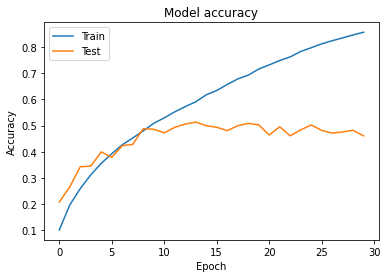

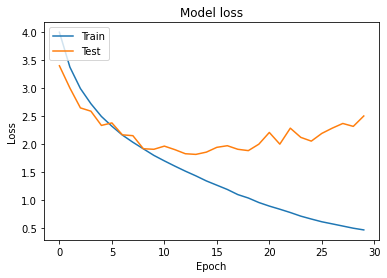

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
import pandas as pd
import io

from google.colab import files
uploaded=files.upload()
data = pd.read_csv(io.StringIO(uploaded['cifar100.csv'].decode('utf-8')))
  # idx 1,3

plt.plot(data['accuracy'])
plt.plot(data['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Comentarios sobre graficos
* A difererencia de CIFAR10, el accuracy del set de entrenamiento se tardo muchas epocas en llegar a 90%. 
* El accuracy del set de validacion se quedo estancado y son muchas previsiones de mejorar. No fue tan variable pero esto muestra que si seguia entrenando por varias epocas, este seguiria estancado.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import for showing the confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


x_train,y_train,x_test,y_test=data()

yPred_probabilities =model.predict(x_test, batch_size=batch_size)
yPred = np.argmax(yPred_probabilities, axis=1)

yTest_original=np.argmax(y_test,axis=1)

cnf_matrix=confusion_matrix(y_true=yTest_original, y_pred=yPred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion 

plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization CIFAR-100')
plt.show()
# Plot normalized confusion 

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix CIFAR-100')
plt.show()

## Actividad 12
La exactitud promedio de set:
- Entrenamiento: 60%
- Validacion: 45%

El promedio de exactitud del set de entrenamiento no es representativo del valor que tuvo en cada epoca. 
El de validacion si es representativo.



## Actividad 13

Utilizando los mismo hiparametros, se obtuvo un exactitud menor en CIFAR100 que en CIFAR10. * Esto tiene sentido dado que tiene una menor cantidad de imagenes para entrenar y un mayor numero de clases. Uno deberia pensar que para entrenar mas clases y uno deberia tener una mayor cantidad de datos. El entrenamiento estuvo bastante debilitado por tener pocos datos.
* Tratando de hacer un simil con las habilidad asociativas que tenemos como humanos, el hecho de que CIFAR100 agrega un nivel de abstraccion con "superclases" hace que exista un nivel de conocimiento mas complejo que deberia ser entrenado en distintas capas. 
* Una posible mejora para obtener mejores resultados en CIFAR100 seria utilizar transfer-learning, donde se entrean subclases con el modelo. Y por otro lado se entrega un mundo de conocimiento o Knowledge base, donde se puedan hacer las asociaciones que se buscan en las "superclases".

